In [10]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


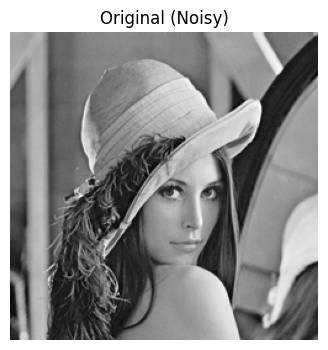

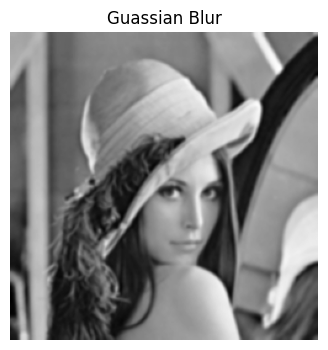

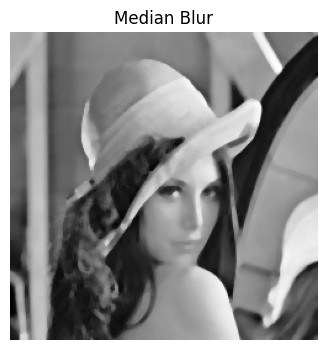

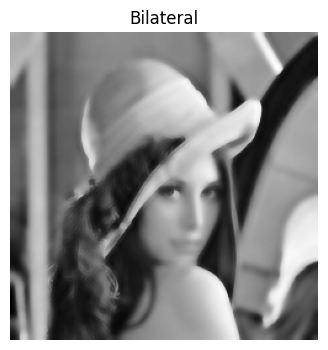

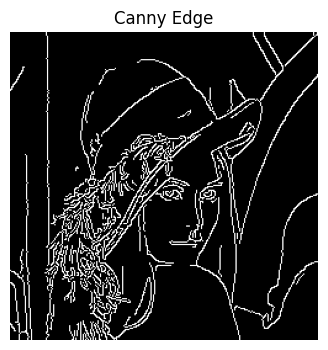

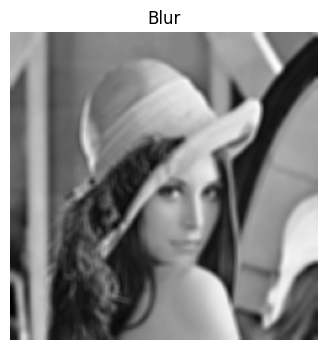

In [12]:
img = cv2.imread('/content/drive/MyDrive/Praktikum Pengolahan Citra_G.211.22.0123/dataset/Lenna.png', 0)
assert img is not None, "noisy_image.jpg tidak ditemukan"

gauss = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
edges = cv2.Canny(img, 100, 200)
blur = cv2.blur(img, (5, 5))

titles = ["Original (Noisy)", "Guassian Blur", "Median Blur", "Bilateral", "Canny Edge", "Blur"]
images = [img, gauss, median, bilateral, edges, blur]

for t, im in zip(titles, images):
  plt.figure(figsize=(5,4));
  plt.imshow(im, cmap='gray');
  plt.title(t);
  plt.axis('off');
  plt.show()

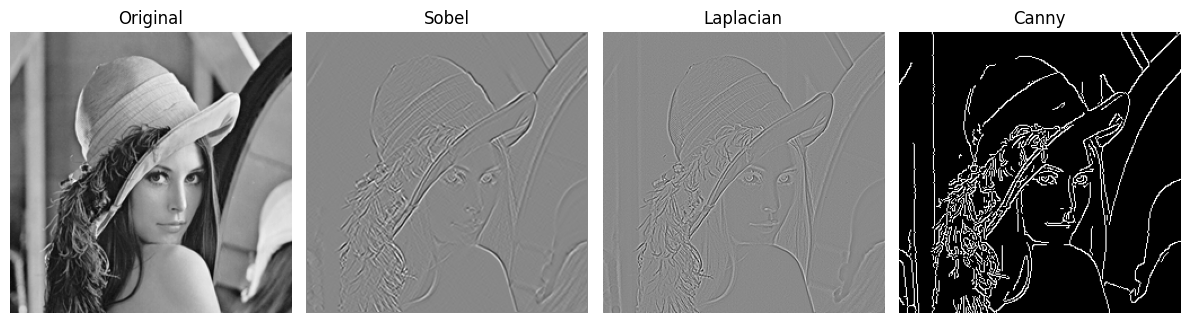

In [14]:
# Apply Edge Detection Methods
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
canny = cv2.Canny(img, 100, 200)

# Display
titles = ['Original', 'Sobel', 'Laplacian', 'Canny']
images = [img, sobel, laplacian, canny]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
vito_v = np.array([[1, 0], [0, -1]])
vito_h = np.array([[0, 1], [-1, 0]])

vito = np.sqrt(vito_v**2 + vito_h**2)

In [24]:
def normalize(img):
  return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

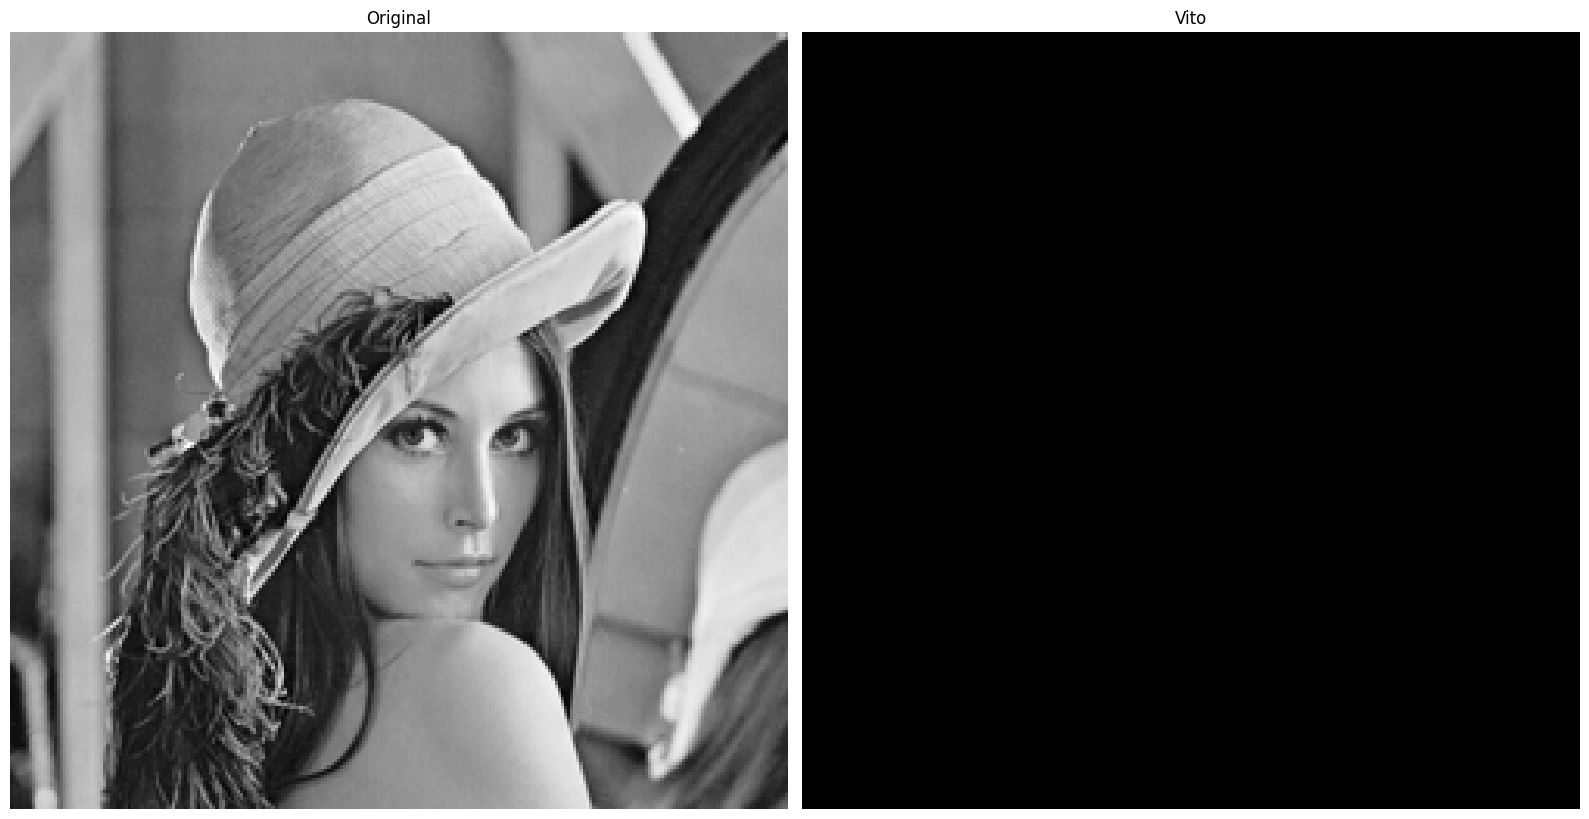

In [26]:
result = {
    "Original": img,
    "Vito": normalize(vito)
}
# --- Display All Methods Side-by-Side ---
plt.figure(figsize=(16, 10))
for i, (name, image) in enumerate(result.items()):
    plt.subplot(1, 2, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()